In [ ]:
"""
Film Industry and Box Office Prediction Model Project
Made by: Claudia Sanchez
Due: December 13th, 2020
In this code I took the TMDB Box Office Prediction data from Kaggle. Using this data we need to predict a movies box office revenue using a number of other categories such as:
            -Budget
            -Cast
            -Crew
            -Production Countries
            -ETC.
However a few things need to be done to the data before it can be useful enough to put inside our three models. 

"""

'\nMovie Box Office Revenue a Machine Learning Project\nMade by: Claudia Sanchez\nDue: December 7th, 2020\nIn this code I took the TMDB Box Office Prediction data from Kaggle. Using this data we need to predict a movies box office revenue using a number of other categories such as:\n            -Budget\n            -Cast\n            -Crew\n            -Production Countries\n            -ETC.\nHowever a few things need to be done to the data before it can be useful enough to put inside our three models. \n\n'

In [ ]:
#Imported the Train File
from google.colab import files
data_to_load_Train = files.upload()

Saving train.csv to train (3).csv


In [ ]:
#Imported the Test File
data_to_load_Test = files.upload()

Saving test.csv to test (1).csv


In [ ]:
#Imported panda and made both files into databases
import pandas as pd
import io
import numpy as np


dfTest = pd.read_csv(io.BytesIO(data_to_load_Test['test.csv']))
dfTrain = pd.read_csv(io.BytesIO(data_to_load_Train['train.csv']))


In [ ]:
#I decided to save the data on the side to make it faster to load into collab when loosing connection
dfTrain.to_csv('TRAIN.csv')
dfTest.to_csv('TEST.csv')

In [ ]:
#The data is now reloaded using the saved csv file on Collab instead of the file inside the local computer
dfTrain=pd.read_csv("TRAIN.csv")
dfTest=pd.read_csv("TEST.csv")

#The data decided to load an new column called 
dfTrain=dfTrain.drop(["Unnamed: 0"], axis=1)
dfTest=dfTest.drop(["Unnamed: 0"], axis=1)

In [ ]:
#Installed a previous version of Seaborn since the new version was giving us trouble in class
!pip install "seaborn<0.11.0"

In [ ]:
#Here I made a new data set based on the original Train and Test datasets, so I can manupulate without hurting the original ones
dfTrainFIXED=dfTrain.copy()
dfTestFIXED=dfTest.copy()

# **Data Explotation**

In [ ]:
#Printed the Train and Test dataset as it is to look at all the columns and rows in it, to explore the data in it 
dfTrainFIXED

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'n

In [ ]:
dfTestFIXED

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,/i8FEQy5IWAqOzXm4uDHy2r3Swym.jpg,"[{'name': 'Intermedia Films', 'id': 763}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de..."
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'n

In [ ]:
#Printed out what type of data is in each column for both datasets to see how I can clean them
print("Train Data Types:")
print(dfTrainFIXED.dtypes)
print("")
print("Test Data Types:")
print(dfTestFIXED.dtypes)

Train Data Types:
id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

Test Data Types:
id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   

# **Clean up of the Train Data**

In [ ]:
#First thing that was done was to turn the release date column from an objecrt type into a date type to make it the right format and then turned into a string to make it easier to divide

dfTrainFIXED['release_date'] = dfTrainFIXED.release_date.astype('datetime64[ns]')

dfTrainFIXED['release_date'] = dfTrainFIXED.release_date.astype(str)


#These functions take the date and split them based on the day, month and year in their respective columns
def year(x):
  x=x.split("-",1)
  return x[0]

def month(x):
  x=x.split("-",1)
  if len(x) == 1:
    return None
  else:
    x=x[1].split("-",1)
    return x[0]

def day(x):
  x=x.split("-",1)
  if len(x) ==1:
    return None
  else:
    x=x[1].split("-",1)
    return x[1]

dfTrainFIXED['release_year']=dfTrainFIXED["release_date"].apply(year)
dfTrainFIXED['release_month']=dfTrainFIXED["release_date"].apply(month)
dfTrainFIXED['release_day']=dfTrainFIXED["release_date"].apply(day)

#Moved the new columns to a similar position to where the release date column date instead of having it at the end of the dataset
Ycolumnname="release_year"
YEAR=dfTrainFIXED.pop(Ycolumnname)
dfTrainFIXED.insert(14,Ycolumnname,YEAR)

Mcolumnname="release_month"
MONTH=dfTrainFIXED.pop(Mcolumnname)
dfTrainFIXED.insert(15,Mcolumnname,MONTH)

Dcolumnname="release_day"
DAY=dfTrainFIXED.pop(Dcolumnname)
dfTrainFIXED.insert(16,Dcolumnname,DAY)








In [ ]:
#The data inside the original_language column is changed from ISO language codes into the actual language name to be easier to understand
for index, value in dfTrainFIXED['original_language'].items():

  if value =="en":
    dfTrainFIXED['original_language'][index]="English"
  elif value =="hi":
    dfTrainFIXED['original_language'][index]="Hindi"
  elif value =="ar":
    dfTrainFIXED['original_language'][index]="Arabic"
  elif value =="ko":
    dfTrainFIXED['original_language'][index]="Korean"
  elif value =="sr":
    dfTrainFIXED['original_language'][index]="Serbian"
  elif value =="fr":
    dfTrainFIXED['original_language'][index]="French"
  elif value =="it":
    dfTrainFIXED['original_language'][index]="Italian"
  elif value =="nl":
    dfTrainFIXED['original_language'][index]="Dutch"
  elif value =="es":
    dfTrainFIXED['original_language'][index]="Spanish"
  elif value =="cs":
    dfTrainFIXED['original_language'][index]="Czech"
  elif value =="ta":
    dfTrainFIXED['original_language'][index]="Tamil"
  elif value =="ru":
    dfTrainFIXED['original_language'][index]="Russian"
  elif value =="da":
    dfTrainFIXED['original_language'][index]="Danish"
  elif value =="de":
    dfTrainFIXED['original_language'][index]="German"
  elif value =="bn":
    dfTrainFIXED['original_language'][index]="Bengali"
  elif value =="cn":
    dfTrainFIXED['original_language'][index]="Chinese (HK)"
  elif value =="zh":
    dfTrainFIXED['original_language'][index]="Chinese (Mainland)"
  elif value =="el":
    dfTrainFIXED['original_language'][index]="Greek"
  elif value =="fa":
    dfTrainFIXED['original_language'][index]="Persian"
  elif value =="fi":
    dfTrainFIXED['original_language'][index]="Finnish"
  elif value =="he":
    dfTrainFIXED['original_language'][index]="Hebrew"
  elif value =="hu":
    dfTrainFIXED['original_language'][index]="Hungarian"
  elif value =="id":
    dfTrainFIXED['original_language'][index]="Indonesian"
  elif value =="ja":
    dfTrainFIXED['original_language'][index]="Japanese"
  elif value =="ml":
    dfTrainFIXED['original_language'][index]="Malayalam"    
  elif value =="mr":
    dfTrainFIXED['original_language'][index]="Marathi"     
  elif value =="no":
    dfTrainFIXED['original_language'][index]="Norwegian"  
  elif value =="nb":
    dfTrainFIXED['original_language'][index]="Norwegian Bokmål"  
  elif value =="pl":
    dfTrainFIXED['original_language'][index]="Polish"  
  elif value =="pt":
    dfTrainFIXED['original_language'][index]="Portuguese"  
  elif value =="ro":
    dfTrainFIXED['original_language'][index]="Romanian"  
  elif value =="sv":
    dfTrainFIXED['original_language'][index]="Swedish"     
  elif value =="te":
    dfTrainFIXED['original_language'][index]="Telugu"   
  elif value =="tr":
    dfTrainFIXED['original_language'][index]="Turkish"  
  elif value =="ur":
    dfTrainFIXED['original_language'][index]="Urdu"  
  elif value =="vi":
    dfTrainFIXED['original_language'][index]="Vietnamese"  
  elif value =="af":
    dfTestFIXED['original_language'][index]="Affrikaans"  
  elif value =="ka":
    dfTestFIXED['original_language'][index]="Georgian"  
  elif value =="bm":
    dfTestFIXED['original_language'][index]="Bambara"  
  elif value =="ca":
    dfTestFIXED['original_language'][index]="Catalan"  
  elif value =="kn":
    dfTestFIXED['original_language'][index]="Kannada"  
  elif value =="th":
    dfTestFIXED['original_language'][index]="Thai" 
  elif value =="is":
    dfTestFIXED['original_language'][index]="Icelandic"    
  elif value =="xx":
    dfTestFIXED['original_language'][index]="Non-Spoken"  



  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-package

In [ ]:
#The belongs_to_collection collumn was reorganized to only showcase the name of the franchise

def collection(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[1].split(",")
    x=x[0].split(":")
    x[1].strip("'")

    return x[1].replace("'", '')

dfTrainFIXED['Collection']=dfTrainFIXED["belongs_to_collection"].apply(collection)

#The new column was moved from the end of the data set to a better location in the begining next to the belongs_to_collection column
Coll=dfTrainFIXED.pop('Collection')
dfTrainFIXED.insert(2,'Collection',Coll)



In [ ]:
#A new column is created to show a 1 or 0 if the movie is part of a franchise of not

dfTrainFIXED['Franchise?']=1

dfTrainFIXED.loc[(dfTrainFIXED['Collection'].isnull()),'Franchise?'] =0

#THe new column is moved to be closer to the other franchise columns
Fran=dfTrainFIXED.pop('Franchise?')
dfTrainFIXED.insert(3,'Franchise?',Fran)


In [ ]:
#A new genre column is created using the information in the genres column 
#The assumption is made that the first genre in the genres column is the main genre for the movie (the one people go to the movie theaters to see)

def genre(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[1].split(",")
    x=x[0].split(":")
    x=x[1].split("}")

    return x[0].replace("'", '')

dfTrainFIXED['Genre']=dfTrainFIXED["genres"].apply(genre)
dfTrainFIXED['Genre']

#The new Genre column is moved from the back of the dataset to have it next to the genres column 
Gen=dfTrainFIXED.pop('Genre')
dfTrainFIXED.insert(6,'Genre',Gen)

In [ ]:
#Next steps is to check the length of the overview of each movie to see if said length can affect revenue 

def LenOverview(x):
  if type(x) != str:
    return x
  else:
    L=len(x)

    return L

dfTrainFIXED['Length of Overview']=dfTrainFIXED["overview"].apply(LenOverview)
dfTrainFIXED['Length of Overview']

#The new Length of Overview is moved from the end of the of the dataset to more in the middle where the overview column is
LenOver=dfTrainFIXED.pop('Length of Overview')
dfTrainFIXED.insert(12,'Length of Overview',LenOver)

In [ ]:
#We move on to the production companies for each movie. We assume that the first production company is the main one. 
#The data is split since its a string and the first production company is put into a new column called: Main Production Company

def ProCompany(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[0].split(",")
    x=x[0].split(":")
    x=x[1].split(",")


    return x[0].replace("'", '')

dfTrainFIXED['Main Production Company']=dfTrainFIXED["production_companies"].apply(ProCompany)
dfTrainFIXED['Main Production Company']

#The new Main Production Company column is moved from the end of the of the dataset to more in the middle where the production_companies column is
ProCom=dfTrainFIXED.pop('Main Production Company')
dfTrainFIXED.insert(16,'Main Production Company',ProCom)

In [ ]:
#Now we grab the data in the production_countries column. Since its also a string I split it and grab the name of the couuntry and put it in a new column 

def ProCountry(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[1].split(",")
    x=x[0].split(":")
    x=x[1].split("}")


    return x[0].replace("'", '')

dfTrainFIXED['Production Country']=dfTrainFIXED["production_countries"].apply(ProCountry)
dfTrainFIXED['Production Country']

#The new Main Production Country column is moved from the end of the of the dataset to more in the middle where the production_countries column is
ProCo=dfTrainFIXED.pop('Production Country')
dfTrainFIXED.insert(18,'Production Country',ProCo)

In [ ]:
#A new column is made with the length of the tagline if the movie had one, to see if it affects the revenue of the movie

def LenTagline(x):
  if type(x) != str:
    return x
  else:
    L=len(x)

    return L

dfTrainFIXED['Length of Tagline']=dfTrainFIXED["tagline"].apply(LenTagline)
dfTrainFIXED['Length of Tagline']

#The new Length Tagline column is moved from the end of the of the dataset to more in the middle where the tagline column is
LenTag=dfTrainFIXED.pop('Length of Tagline')
dfTrainFIXED.insert(27,'Length of Tagline',LenTag)

In [ ]:
#Here I split up the cast column grabbing the Actors names and their genders. 
#I made the assumption that the first 4 actors were the main characters/ those with top billing. 
#A new dataset was made housing this information, its columns were later added to the main dataframe and in the right order

def Cast(x):
	outdata = {
		'actor[0].name': None,
		'actor[0].gender': None,
		'actor[1].name': None,
		'actor[1].gender': None,
		'actor[2].name': None,
		'actor[2].gender': None,
		'actor[3].name': None,
		'actor[3].gender': None,
	}
	outseries = pd.Series(outdata, pd.Index(list(outdata.keys())))

	if type(x) != str:
		return outseries

	data = eval(x)

	if len(data) == 0:
		return outseries
	outseries['actor[0].name'] = data[0]['name']
	outseries['actor[0].gender'] = data[0]['gender']

	if len(data) == 1:
		return outseries
	outseries['actor[1].name'] = data[1]['name']
	outseries['actor[1].gender'] = data[1]['gender']

	if len(data) == 2:
		return outseries
	outseries['actor[2].name'] = data[2]['name']
	outseries['actor[2].gender'] = data[2]['gender']

	if len(data) == 3:
		return outseries
	outseries['actor[3].name'] = data[3]['name']
	outseries['actor[3].gender'] = data[3]['gender']

	return outseries


LL=dfTrainFIXED["cast"].copy()
Practice=LL.apply(Cast)


#The new Actors and Actors Genders columns were moved from the end of the of the dataset to more in the middle where the cast column is
dfTrainFIXED['Actor 1'] = Practice['actor[0].name'].astype(str)
dfTrainFIXED['Actor 1 Gender'] = Practice['actor[0].gender'].astype(float)
Act1=dfTrainFIXED.pop('Actor 1')
dfTrainFIXED.insert(31,'Actor 1',Act1)
Act1G=dfTrainFIXED.pop('Actor 1 Gender')
dfTrainFIXED.insert(32,'Actor 1 Gender',Act1G)

dfTrainFIXED['Actor 2'] = Practice['actor[1].name'].astype(str)
dfTrainFIXED['Actor 2 Gender'] = Practice['actor[1].gender'].astype(float)
Act2=dfTrainFIXED.pop('Actor 2')
dfTrainFIXED.insert(33,'Actor 2',Act2)
Act2G=dfTrainFIXED.pop('Actor 2 Gender')
dfTrainFIXED.insert(34,'Actor 2 Gender',Act2G)

dfTrainFIXED['Actor 3'] = Practice['actor[2].name'].astype(str)
dfTrainFIXED['Actor 3 Gender'] = Practice['actor[2].gender'].astype(float)
Act3=dfTrainFIXED.pop('Actor 3')
dfTrainFIXED.insert(35,'Actor 3',Act3)
Act3G=dfTrainFIXED.pop('Actor 3 Gender')
dfTrainFIXED.insert(36,'Actor 3 Gender',Act3G)

dfTrainFIXED['Actor 4'] = Practice['actor[3].name'].astype(str)
dfTrainFIXED['Actor 4 Gender'] = Practice['actor[3].gender'].astype(float)
Act4=dfTrainFIXED.pop('Actor 4')
dfTrainFIXED.insert(37,'Actor 4',Act4)
Act4G=dfTrainFIXED.pop('Actor 4 Gender')
dfTrainFIXED.insert(38,'Actor 4 Gender',Act4G)


In [ ]:
#Three new collumns were made to show how many men/women/unknown there were within the main cast of four, ie if the movie was mostly comprised of leading men or women
#This was done using count and adding up how many men, women and unknown are within our main cast of 4 actors
def GenderSplit(x):
	outdata = {
		'Men': 0,
    'Women': 0,
    'Unknown': 0,
	}
	outseries = pd.Series(outdata, pd.Index(list(outdata.keys())))

	if type(x) != str:
		return outseries

	data = eval(x)

	for i, x in enumerate(data):
		if i>=4:
		  break 
		if x["gender"]==2:
		  outseries["Men"]+=1
		elif x["gender"]==1:
		  outseries["Women"]+=1
		elif x["gender"]==0:
		  outseries["Unknown"]+=1

		
	return outseries


CC=dfTrainFIXED["cast"].copy()
Pra=CC.apply(GenderSplit)

#Made sure that the numbers(gender) taken are floats insteaf of strings
dfTrainFIXED['Amount of Men'] = Pra['Men'].astype(float)
dfTrainFIXED['Amount of Women'] = Pra['Women'].astype(float)
dfTrainFIXED['Amount of Unknown'] = Pra['Unknown'].astype(float)

#The new Amount of Men/Women/Unknown columns were moved from the end of the of the dataset to more in the middle where the Actors columns are
MA=dfTrainFIXED.pop('Amount of Men')
dfTrainFIXED.insert(39,'Amount of Men',MA)

FA=dfTrainFIXED.pop('Amount of Women')
dfTrainFIXED.insert(40,'Amount of Women',FA)

UA=dfTrainFIXED.pop('Amount of Unknown')
dfTrainFIXED.insert(41,'Amount of Unknown',UA)








In [ ]:
#Here I extracted the director from the crew column by scanning the crew column to find someone with the Director job.
#I also took their gender and made a new column for it as well

def Director(x):
	outdata = {
		'Director.name': None,
    'Director.gender': None,
	}
	outseries = pd.Series(outdata, pd.Index(list(outdata.keys())))

	if type(x) != str:
		return outseries

	data = eval(x)

	for x in data:
		if x["job"]=="Director":
		  outseries["Director.name"]=x["name"]
		  outseries["Director.gender"]=x["gender"]

		
	return outseries


CC=dfTrainFIXED["crew"].copy()
Pra=CC.apply(Director)

#The new Director and Director Gender columns were moved from the end of the of the dataset to next to where the crew column is
dfTrainFIXED['Director'] = Pra['Director.name'].astype(str)
dfTrainFIXED['Director Gender'] = Pra['Director.gender'].astype(float)
Dir=dfTrainFIXED.pop('Director')
dfTrainFIXED.insert(43,'Director',Dir)
DirG=dfTrainFIXED.pop('Director Gender')
dfTrainFIXED.insert(44,'Director Gender',DirG)

In [ ]:
#Here the irrelevant columns are dropped from the dataframe

dfTrainFIXED = dfTrainFIXED.drop(['belongs_to_collection','Collection','genres','homepage','imdb_id','original_title','overview','poster_path','production_companies','production_countries','release_date','spoken_languages','tagline','Keywords','cast','crew'], axis=1)


In [ ]:
dfTrainFIXED

,id,Franchise?,budget,Genre,original_language,Length of Overview,popularity,Main Production Company,Production Country,release_year,release_month,release_day,runtime,status,Length of Tagline,title,Actor 1,Actor 1 Gender,Actor 2,Actor 2 Gender,Actor 3,Actor 3 Gender,Actor 4,Actor 4 Gender,Amount of Men,Amount of Women,Amount of Unknown,Director,Director Gender,revenue
0,1,1,14000000,Comedy,English,155.0,6.575393,Paramount Pictures,United States of America,2015,02,20,93.0,Released,52.0,Hot Tub Time Machine 2,Rob Corddry,2.0,Craig Robinson,2.0,Clark Duke,2.0,Adam Scott,2.0,4.0,0.0,0.0,Steve Pink,2.0,12314651
1,2,1,40000000,Comedy,English,393.0,8.248895,Walt Disney Pictures,United States of America,2004,08,06,113.0,Released,60.0,The Princess Diaries 2: Royal Engagement,Anne Hathaway,1.0,Julie Andrews,1.0,H√©ctor Elizondo,2.0,John Rhys-Davies,2.0,2.0,2.0,0.0,Garry Marshall,2.0,95149435
2,3,0,3300000,Drama,English,130.0,64.299990,Bold Films,United States of America,2014,10,10,105.0,Released,47.0,Whiplash,Miles Teller,2.0,J.K. Simmons,2.0,Melissa Benoist,1.0,Austin Stowell,2.0,3.0,1.0,0.0,Damien Chazelle,2.0,13092000
3,4,0,1200000,Thriller,Hindi,581.0,3.174936,NaN,India,2012,03,09,122.0,Released,NaN,Kahaani,Vidya Balan,1.0,Nawazuddin Siddiqui,2.0,Parambrata Chatterjee,0.0,Saswata Chatterjee,0.0,1.0,1.0,2.0,Sujoy Ghosh,0.0,16000000
4,5,0,0,Action,Korean,168.0,1.148070,NaN,South Korea,2009,02,05,118.0,Released,NaN,Marine Boy,Kim Kang-woo,2.0,Jo Jae-hyeon,2.0,Park Si-yeon,2.0,Kim Joon-bae,2.0,4.0,0.0,0.0,Jong-seok Yoon,0.0,3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,0,Comedy,English,261.0,9.853270,Warner Bros.,United States of America,1994,04,22,102.0,Released,85.0,Chasers,Tom Berenger,2.0,William McNamara,2.0,–≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫,1.0,Crispin Glover,2.0,3.0,1.0,0.0,Dennis Hopper,2.0,1596687
2996,2997,0,0,Drama,Swedish,141.0,3.727996,Memfis Film,Denmark,2013,03,28,102.0,Released,NaN,We Are the Best!,Mira Barkhammar,0.0,Mira Grosin,0.0,Liv LeMoyne,0.0,David Dencik,2.0,1.0,0.0,3.0,Lukas Moodysson,2.0,180590
2997,2998,0,65000000,Crime,English,318.0,14.482345,New Line Cinema,United States of America,1996,10,11,120.0,Released,36.0,The Long Kiss Goodnight,Geena Davis,1.0,Samuel L. Jackson,2.0,Yvonne Zima,1.0,Craig Bierko,2.0,2.0,2.0,0.0,Renny Harlin,2.0,89456761
2998,2999,0,42000000,Comedy,English,341.0,15.725542,Jersey Films,United States of America,2004,01,16,90.0,Released,69.0,Along Came Polly,Ben Stiller,2.0,Jennifer Aniston,1.0,Philip Seymour Hoffman,2.0,Debra Messing,1.0,2.0,2.0,0.0,John Hamburg,2.0,171963386


# **Clean up of the Test Data**

In [ ]:
#First thing that was done was to turn the release date column from an objecrt type into a date type to make it the right format and then turned into a string to make it easier to divide

dfTestFIXED['release_date'] = dfTestFIXED.release_date.astype('datetime64[ns]')

dfTestFIXED['release_date'] = dfTestFIXED.release_date.astype(str)


#These fuctions take the date and split them based on the day, month and year in their respective columns
def year(x):
  x=x.split("-",1)
  return x[0]

def month(x):
  x=x.split("-",1)
  if len(x) == 1:
    return None
  else:
    x=x[1].split("-",1)
    return x[0]

def day(x):
  x=x.split("-",1)
  if len(x) ==1:
    return None
  else:
    x=x[1].split("-",1)
    return x[1]

dfTestFIXED['release_year']=dfTestFIXED["release_date"].apply(year)
dfTestFIXED['release_month']=dfTestFIXED["release_date"].apply(month)

dfTestFIXED['release_day']=dfTestFIXED["release_date"].apply(day)

#Moved the new columns to a similar position to where the release date column date instead of having it at the end of the dataset
Ycolumnname="release_year"
YEAR=dfTestFIXED.pop(Ycolumnname)
dfTestFIXED.insert(14,Ycolumnname,YEAR)

Mcolumnname="release_month"
MONTH=dfTestFIXED.pop(Mcolumnname)
dfTestFIXED.insert(15,Mcolumnname,MONTH)

Dcolumnname="release_day"
DAY=dfTestFIXED.pop(Dcolumnname)
dfTestFIXED.insert(16,Dcolumnname,DAY)


In [ ]:
#The data inside the original_language column is changed from ISO language codes into the actual language name to be easier to understand
for index, value in dfTestFIXED['original_language'].items():

  if value =="en":
    dfTestFIXED['original_language'][index]="English"
  elif value =="hi":
    dfTestFIXED['original_language'][index]="Hindi"
  elif value =="ar":
    dfTestFIXED['original_language'][index]="Arabic"
  elif value =="ko":
    dfTestFIXED['original_language'][index]="Korean"
  elif value =="sr":
    dfTestFIXED['original_language'][index]="Serbian"
  elif value =="fr":
    dfTestFIXED['original_language'][index]="French"
  elif value =="it":
    dfTestFIXED['original_language'][index]="Italian"
  elif value =="nl":
    dfTestFIXED['original_language'][index]="Dutch"
  elif value =="es":
    dfTestFIXED['original_language'][index]="Spanish"
  elif value =="cs":
    dfTestFIXED['original_language'][index]="Czech"
  elif value =="ta":
    dfTestFIXED['original_language'][index]="Tamil"
  elif value =="ru":
    dfTestFIXED['original_language'][index]="Russian"
  elif value =="da":
    dfTestFIXED['original_language'][index]="Danish"
  elif value =="de":
    dfTestFIXED['original_language'][index]="German"
  elif value =="bn":
    dfTestFIXED['original_language'][index]="Bengali"
  elif value =="cn":
    dfTestFIXED['original_language'][index]="Chinese (HK)"
  elif value =="zh":
    dfTestFIXED['original_language'][index]="Chinese (Mainland)"
  elif value =="el":
    dfTestFIXED['original_language'][index]="Greek"
  elif value =="fa":
    dfTestFIXED['original_language'][index]="Persian"
  elif value =="fi":
    dfTestFIXED['original_language'][index]="Finnish"
  elif value =="he":
    dfTestFIXED['original_language'][index]="Hebrew"
  elif value =="hu":
    dfTestFIXED['original_language'][index]="Hungarian"
  elif value =="id":
    dfTestFIXED['original_language'][index]="Indonesian"
  elif value =="ja":
    dfTestFIXED['original_language'][index]="Japanese"
  elif value =="ml":
    dfTestFIXED['original_language'][index]="Malayalam"    
  elif value =="mr":
    dfTestFIXED['original_language'][index]="Marathi"     
  elif value =="no":
    dfTestFIXED['original_language'][index]="Norwegian"  
  elif value =="nb":
    dfTestFIXED['original_language'][index]="Norwegian Bokmål"  
  elif value =="pl":
    dfTestFIXED['original_language'][index]="Polish"  
  elif value =="pt":
    dfTestFIXED['original_language'][index]="Portuguese"  
  elif value =="ro":
    dfTestFIXED['original_language'][index]="Romanian"  
  elif value =="sv":
    dfTestFIXED['original_language'][index]="Swedish"     
  elif value =="te":
    dfTestFIXED['original_language'][index]="Telugu"   
  elif value =="tr":
    dfTestFIXED['original_language'][index]="Turkish"  
  elif value =="ur":
    dfTestFIXED['original_language'][index]="Urdu"  
  elif value =="vi":
    dfTestFIXED['original_language'][index]="Vietnamese"  
  elif value =="af":
    dfTestFIXED['original_language'][index]="Affrikaans"  
  elif value =="ka":
    dfTestFIXED['original_language'][index]="Georgian"  
  elif value =="bm":
    dfTestFIXED['original_language'][index]="Bambara"  
  elif value =="ca":
    dfTestFIXED['original_language'][index]="Catalan"  
  elif value =="kn":
    dfTestFIXED['original_language'][index]="Kannada"  
  elif value =="th":
    dfTestFIXED['original_language'][index]="Thai" 
  elif value =="is":
    dfTestFIXED['original_language'][index]="Icelandic"   
  elif value =="xx":
    dfTestFIXED['original_language'][index]="Non-Spoken"  




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: S

In [ ]:
#The belongs_to_collection collumn was reorganized to only showcase the name of the franchise

def collection(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[1].split(",")
    x=x[0].split(":")
    x[1].strip("'")

    return x[1].replace("'", '')

dfTestFIXED['Collection']=dfTestFIXED["belongs_to_collection"].apply(collection)

#The new column was moved from the end of the data set to a better location in the begining next to the belongs_to_collection column
Coll=dfTestFIXED.pop('Collection')
dfTestFIXED.insert(2,'Collection',Coll)

In [ ]:
#A new column is created to show a 1 or 0 if the movie is part of a franchise of not

dfTestFIXED['Franchise?']=1

dfTestFIXED.loc[(dfTestFIXED['Collection'].isnull()),'Franchise?'] =0

#THe new column is moved to be closer to the other franchise columns
Fran=dfTestFIXED.pop('Franchise?')
dfTestFIXED.insert(3,'Franchise?',Fran)

In [ ]:
#A new genre column is created using the information in the genres column 
#The assumption is made that the first genre in the genres column is the main genre for the movie (the one people go to the movie theaters to see)

def genre(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[1].split(",")
    x=x[0].split(":")
    x=x[1].split("}")

    return x[0].replace("'", '')

dfTestFIXED['Genre']=dfTestFIXED["genres"].apply(genre)
dfTestFIXED['Genre']

#The new Genre column is moved from the back of the dataset to have it next to the genres column 
Gen=dfTestFIXED.pop('Genre')
dfTestFIXED.insert(6,'Genre',Gen)

In [ ]:
#Next steps is to check the length of the overview of each movie to see if said length can affect revenue 

def LenOverview(x):
  if type(x) != str:
    return x
  else:
    L=len(x)

    return L

dfTestFIXED['Length of Overview']=dfTestFIXED["overview"].apply(LenOverview)
dfTestFIXED['Length of Overview']

#The new Length of Overview is moved from the end of the of the dataset to more in the middle where the overview column is
LenOver=dfTestFIXED.pop('Length of Overview')
dfTestFIXED.insert(12,'Length of Overview',LenOver)

In [ ]:
#We move on to the production companies for each movie. We assume that the first production company is the main one. 
#The data is split since its a string and the first production company is put into a new column called: Main Production Company

def ProCompany(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[0].split(",")
    x=x[0].split(":")
    x=x[1].split(",")


    return x[0].replace("'", '')

dfTestFIXED['Main Production Company']=dfTestFIXED["production_companies"].apply(ProCompany)
dfTestFIXED['Main Production Company']

#The new Main Production Company column is moved from the end of the of the dataset to more in the middle where the production_companies column is
ProCom=dfTestFIXED.pop('Main Production Company')
dfTestFIXED.insert(16,'Main Production Company',ProCom)

In [ ]:
#Now we grab the data in the production_countries column. Since its also a string I split it and grab the name of the couuntry and put it in a new column 

def ProCountry(x):
  if type(x) != str:
    return x
  else:
    x=x.split(",")
    x=x[1].split(",")
    x=x[0].split(":")
    x=x[1].split("}")


    return x[0].replace("'", '')

dfTestFIXED['Production Country']=dfTestFIXED["production_countries"].apply(ProCountry)
dfTestFIXED['Production Country']

#The new Main Production Country column is moved from the end of the of the dataset to more in the middle where the production_countries column is
ProCo=dfTestFIXED.pop('Production Country')
dfTestFIXED.insert(18,'Production Country',ProCo)

In [ ]:
#A new column is made with the length of the tagline if the movie had one, to see if it affects the revenue of the movie

def LenTagline(x):
  if type(x) != str:
    return x
  else:
    L=len(x)

    return L

dfTestFIXED['Length of Tagline']=dfTestFIXED["tagline"].apply(LenTagline)
dfTestFIXED['Length of Tagline']

#The new Length Tagline column is moved from the end of the of the dataset to more in the middle where the tagline column is
LenTag=dfTestFIXED.pop('Length of Tagline')
dfTestFIXED.insert(27,'Length of Tagline',LenTag)

In [ ]:
#Here I split up the cast column grabbing the Actors names and their genders. 
#I made the assumption that the first 4 actors were the main characters/ those with top billing. 
#A new dataset was made housing this information, its columns were later added to the main dataframe and in the right order

def Cast(x):
	outdata = {
		'actor[0].name': None,
		'actor[0].gender': None,
		'actor[1].name': None,
		'actor[1].gender': None,
		'actor[2].name': None,
		'actor[2].gender': None,
		'actor[3].name': None,
		'actor[3].gender': None,
	}
	outseries = pd.Series(outdata, pd.Index(list(outdata.keys())))

	if type(x) != str:
		return outseries

	data = eval(x)

	if len(data) == 0:
		return outseries
	outseries['actor[0].name'] = data[0]['name']
	outseries['actor[0].gender'] = data[0]['gender']

	if len(data) == 1:
		return outseries
	outseries['actor[1].name'] = data[1]['name']
	outseries['actor[1].gender'] = data[1]['gender']

	if len(data) == 2:
		return outseries
	outseries['actor[2].name'] = data[2]['name']
	outseries['actor[2].gender'] = data[2]['gender']

	if len(data) == 3:
		return outseries
	outseries['actor[3].name'] = data[3]['name']
	outseries['actor[3].gender'] = data[3]['gender']

	return outseries


LL=dfTestFIXED["cast"].copy()
Practice=LL.apply(Cast)


#The new Actors and Actors Genders columns were moved from the end of the of the dataset to more in the middle where the cast column is
dfTestFIXED['Actor 1'] = Practice['actor[0].name'].astype(str)
dfTestFIXED['Actor 1 Gender'] = Practice['actor[0].gender'].astype(float)
Act1=dfTestFIXED.pop('Actor 1')
dfTestFIXED.insert(31,'Actor 1',Act1)
Act1G=dfTestFIXED.pop('Actor 1 Gender')
dfTestFIXED.insert(32,'Actor 1 Gender',Act1G)

dfTestFIXED['Actor 2'] = Practice['actor[1].name'].astype(str)
dfTestFIXED['Actor 2 Gender'] = Practice['actor[1].gender'].astype(float)
Act2=dfTestFIXED.pop('Actor 2')
dfTestFIXED.insert(33,'Actor 2',Act2)
Act2G=dfTestFIXED.pop('Actor 2 Gender')
dfTestFIXED.insert(34,'Actor 2 Gender',Act2G)

dfTestFIXED['Actor 3'] = Practice['actor[2].name'].astype(str)
dfTestFIXED['Actor 3 Gender'] = Practice['actor[2].gender'].astype(float)
Act3=dfTestFIXED.pop('Actor 3')
dfTestFIXED.insert(35,'Actor 3',Act3)
Act3G=dfTestFIXED.pop('Actor 3 Gender')
dfTestFIXED.insert(36,'Actor 3 Gender',Act3G)

dfTestFIXED['Actor 4'] = Practice['actor[3].name'].astype(str)
dfTestFIXED['Actor 4 Gender'] = Practice['actor[3].gender'].astype(float)
Act4=dfTestFIXED.pop('Actor 4')
dfTestFIXED.insert(37,'Actor 4',Act4)
Act4G=dfTestFIXED.pop('Actor 4 Gender')
dfTestFIXED.insert(38,'Actor 4 Gender',Act4G)

In [ ]:
#Three new collumns were made to show how many men/women/unknown there were within the main cast of four, ie if the movie was mostly comprised of leading men or women
#This was done using count and adding up how many men, women and unknown are within our main cast of 4 actors
def GenderSplit(x):
	outdata = {
		'Men': 0,
    'Women': 0,
    'Unknown': 0,
	}
	outseries = pd.Series(outdata, pd.Index(list(outdata.keys())))

	if type(x) != str:
		return outseries

	data = eval(x)

	for i, x in enumerate(data):
		if i>=4:
		  break 
		if x["gender"]==2:
		  outseries["Men"]+=1
		elif x["gender"]==1:
		  outseries["Women"]+=1
		elif x["gender"]==0:
		  outseries["Unknown"]+=1

		
	return outseries


CC=dfTestFIXED["cast"].copy()
Pra=CC.apply(GenderSplit)

#Made sure that the numbers(gender) taken are floats insteaf of strings
dfTestFIXED['Amount of Men'] = Pra['Men'].astype(float)
dfTestFIXED['Amount of Women'] = Pra['Women'].astype(float)
dfTestFIXED['Amount of Unknown'] = Pra['Unknown'].astype(float)

#The new Amount of Men/Women/Unknown columns were moved from the end of the of the dataset to more in the middle where the Actors columns are
MA=dfTestFIXED.pop('Amount of Men')
dfTestFIXED.insert(39,'Amount of Men',MA)

FA=dfTestFIXED.pop('Amount of Women')
dfTestFIXED.insert(40,'Amount of Women',FA)

UA=dfTestFIXED.pop('Amount of Unknown')
dfTestFIXED.insert(41,'Amount of Unknown',UA)





In [ ]:
#Here I extracted the director from the crew column by scanning the crew column to find someone with the Director job.
#I also took their gender and made a new column for it as well

def Director(x):
	outdata = {
		'Director.name': None,
    'Director.gender': None,
	}
	outseries = pd.Series(outdata, pd.Index(list(outdata.keys())))

	if type(x) != str:
		return outseries

	data = eval(x)

	for x in data:
		if x["job"]=="Director":
		  outseries["Director.name"]=x["name"]
		  outseries["Director.gender"]=x["gender"]

		
	return outseries


CC=dfTestFIXED["crew"].copy()
Pra=CC.apply(Director)

#The new Director and Director Gender columns were moved from the end of the of the dataset to next to where the crew column is
dfTestFIXED['Director'] = Pra['Director.name'].astype(str)
dfTestFIXED['Director Gender'] = Pra['Director.gender'].astype(float)
Dir=dfTestFIXED.pop('Director')
dfTestFIXED.insert(43,'Director',Dir)
DirG=dfTestFIXED.pop('Director Gender')
dfTestFIXED.insert(44,'Director Gender',DirG)

In [ ]:
#Here the irrelevant columns are dropped from the dataframe

dfTestFIXED = dfTestFIXED.drop(['belongs_to_collection','Collection','genres','homepage','imdb_id','original_title','overview','poster_path','production_companies','production_countries','release_date','spoken_languages','tagline','Keywords','cast','crew'], axis=1)

In [ ]:
dfTestFIXED

,id,Franchise?,budget,Genre,original_language,Length of Overview,popularity,Main Production Company,Production Country,release_year,release_month,release_day,runtime,status,Length of Tagline,title,Actor 1,Actor 1 Gender,Actor 2,Actor 2 Gender,Actor 3,Actor 3 Gender,Actor 4,Actor 4 Gender,Amount of Men,Amount of Women,Amount of Unknown,Director,Director Gender
0,3001,1,0,Adventure,Japanese,335.0,3.851534,NaN,Japan,2007,07,14,90.0,Released,51.0,Pokémon: The Rise of Darkrai,Craig Blair,0.0,Emily Bauer,1.0,Sarah Natochenny,1.0,Ikue ≈åtani,1.0,0.0,3.0,1.0,Kunihiko Yuyama,0.0
1,3002,0,88000,Horror,English,162.0,3.559789,Woolner Brothers Pictures Inc.,United States of America,2058,05,19,65.0,Released,96.0,Attack of the 50 Foot Woman,Allison Hayes,1.0,William Hudson,0.0,Yvette Vickers,1.0,Roy Gordon,0.0,0.0,2.0,2.0,Nathan H. Juran,0.0
2,3003,0,0,Comedy,English,362.0,8.085194,Warner Bros.,United States of America,1997,05,23,100.0,Released,41.0,Addicted to Love,Meg Ryan,1.0,Matthew Broderick,2.0,Kelly Preston,1.0,Tch√©ky Karyo,2.0,2.0,2.0,0.0,Griffin Dunne,0.0
3,3004,0,6800000,Drama,French,302.0,8.596012,TS Productions,Canada,2010,09,04,130.0,Released,55.0,Incendies,Lubna Azabal,1.0,M√©lissa D√©sormeaux-Poulin,1.0,Maxim Gaudette,0.0,R√©my Girard,2.0,1.0,2.0,1.0,Denis Villeneuve,2.0
4,3005,0,2000000,History,English,894.0,3.217680,NaN,United States of America,2005,02,11,92.0,Released,221.0,Inside Deep Throat,Dennis Hopper,2.0,Peter Bart,2.0,Warren Beatty,2.0,Carl Bernstein,2.0,4.0,0.0,0.0,Randy Barbato,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,0,42000000,Thriller,English,151.0,9.970359,Intermedia Films,France,2001,08,03,118.0,Released,51.0,Original Sin,Angelina Jolie,1.0,Antonio Banderas,2.0,Gregory Itzin,2.0,Jack Thompson,2.0,3.0,1.0,0.0,Michael Cristofer,2.0
4394,7395,1,19000000,Action,English,457.0,6.046516,Paramount Pictures,United States of America,2004,08,20,95.0,Released,73.0,Without a Paddle,Seth Green,2.0,Matthew Lillard,2.0,Dax Shepard,2.0,Antony Starr,2.0,4.0,0.0,0.0,Steven Brill,2.0
4395,7396,0,16000000,Drama,English,504.0,9.596883,Twentieth Century Fox Film Corporation,United States of America,1982,12,08,129.0,Released,200.0,The Verdict,Paul Newman,2.0,Charlotte Rampling,1.0,Jack Warden,2.0,James Mason,2.0,3.0,1.0,0.0,Sidney Lumet,2.0
4396,7397,0,2000000,Horror,English,352.0,20.359336,Northern Lights Films,United States of America,2015,02,04,100.0,Released,53.0,It Follows,Maika Monroe,1.0,Keir Gilchrist,2.0,Daniel Zovatto,0.0,Jake Weary,2.0,2.0,1.0,1.0,David Robert Mitchell,2.0


# **Exploratory Data Analysis**

In [ ]:
#Imported Seaborn and Mathplotlib to create visualizations of the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#I decided to join both dataframes to be able to create the graphs later on using all of our data
#First though I made a copy of the dataframes as to not change them
dfTrainData=dfTrainFIXED.copy()
dfTestData=dfTestFIXED.copy()

#I then added a new column to each of the dataframes just to tell which one's are from the train and test data sets
dfTrainData["dataset"]="Train"
dfTestData["dataset"]="Test"
frames= [dfTrainData, dfTestData]
AllData = pd.concat(frames)
AllData

,id,Franchise?,budget,Genre,original_language,Length of Overview,popularity,Main Production Company,Production Country,release_year,release_month,release_day,runtime,status,Length of Tagline,title,Actor 1,Actor 1 Gender,Actor 2,Actor 2 Gender,Actor 3,Actor 3 Gender,Actor 4,Actor 4 Gender,Amount of Men,Amount of Women,Amount of Unknown,Director,Director Gender,revenue,dataset
0,1,1,14000000,Comedy,English,155.0,6.575393,Paramount Pictures,United States of America,2015,02,20,93.0,Released,52.0,Hot Tub Time Machine 2,Rob Corddry,2.0,Craig Robinson,2.0,Clark Duke,2.0,Adam Scott,2.0,4.0,0.0,0.0,Steve Pink,2.0,12314651.0,Train
1,2,1,40000000,Comedy,English,393.0,8.248895,Walt Disney Pictures,United States of America,2004,08,06,113.0,Released,60.0,The Princess Diaries 2: Royal Engagement,Anne Hathaway,1.0,Julie Andrews,1.0,H√©ctor Elizondo,2.0,John Rhys-Davies,2.0,2.0,2.0,0.0,Garry Marshall,2.0,95149435.0,Train
2,3,0,3300000,Drama,English,130.0,64.299990,Bold Films,United States of America,2014,10,10,105.0,Released,47.0,Whiplash,Miles Teller,2.0,J.K. Simmons,2.0,Melissa Benoist,1.0,Austin Stowell,2.0,3.0,1.0,0.0,Damien Chazelle,2.0,13092000.0,Train
3,4,0,1200000,Thriller,Hindi,581.0,3.174936,NaN,India,2012,03,09,122.0,Released,NaN,Kahaani,Vidya Balan,1.0,Nawazuddin Siddiqui,2.0,Parambrata Chatterjee,0.0,Saswata Chatterjee,0.0,1.0,1.0,2.0,Sujoy Ghosh,0.0,16000000.0,Train
4,5,0,0,Action,Korean,168.0,1.148070,NaN,South Korea,2009,02,05,118.0,Released,NaN,Marine Boy,Kim Kang-woo,2.0,Jo Jae-hyeon,2.0,Park Si-yeon,2.0,Kim Joon-bae,2.0,4.0,0.0,0.0,Jong-seok Yoon,0.0,3923970.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,0,42000000,Thriller,English,151.0,9.970359,Intermedia Films,France,2001,08,03,118.0,Released,51.0,Original Sin,Angelina Jolie,1.0,Antonio Banderas,2.0,Gregory Itzin,2.0,Jack Thompson,2.0,3.0,1.0,0.0,Michael Cristofer,2.0,NaN,Test
4394,7395,1,19000000,Action,English,457.0,6.046516,Paramount Pictures,United States of America,2004,08,20,95.0,Released,73.0,Without a Paddle,Seth Green,2.0,Matthew Lillard,2.0,Dax Shepard,2.0,Antony Starr,2.0,4.0,0.0,0.0,Steven Brill,2.0,NaN,Test
4395,7396,0,16000000,Drama,English,504.0,9.596883,Twentieth Century Fox Film Corporation,United States of America,1982,12,08,129.0,Released,200.0,The Verdict,Paul Newman,2.0,Charlotte Rampling,1.0,Jack Warden,2.0,James Mason,2.0,3.0,1.0,0.0,Sidney Lumet,2.0,NaN,Test
4396,7397,0,2000000,Horror,English,352.0,20.359336,Northern Lights Films,United States of America,2015,02,04,100.0,Released,53.0,It Follows,Maika Monroe,1.0,Keir Gilchrist,2.0,Daniel Zovatto,0.0,Jake Weary,2.0,2.0,1.0,1.0,David Robert Mitchell,2.0,NaN,Test


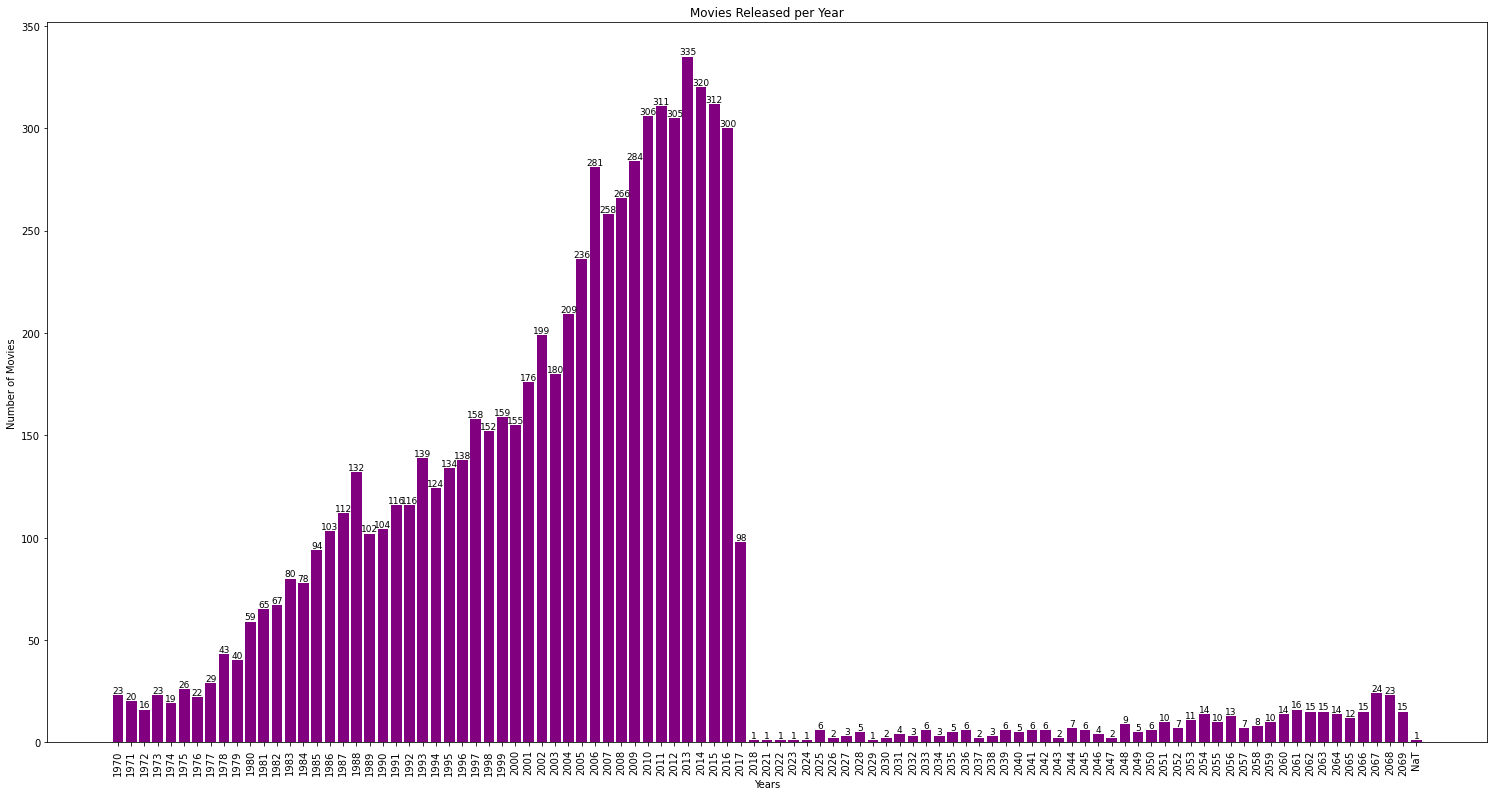

In [ ]:
#This first Figure is to show how many movies were realeased per year using mathplotlib
d1 = AllData['release_year'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xlabel('Years')
plt.ylabel('Number of Movies')
label = d1.values

plt.xticks(rotation=90)
plt.title('Movies Released per Year')

label = d1.values

for i in range(99):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')

plt.show()


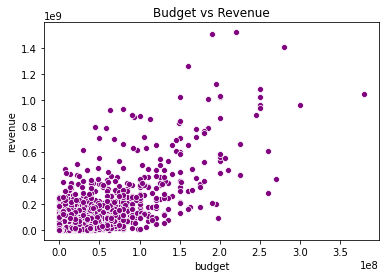

In [ ]:
#A scatterplots to show Revenue vs Budget, Revenue vs Popularity, Revenue vs Runtime
plt.title('Budget vs Revenue')
sns.scatterplot(data = AllData, x = "budget", y = "revenue", color='purple')


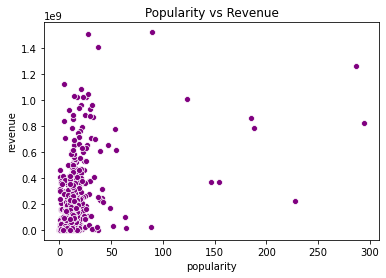

In [ ]:
plt.title('Popularity vs Revenue')
sns.scatterplot(data = AllData, x = "popularity", y = "revenue", color='purple')


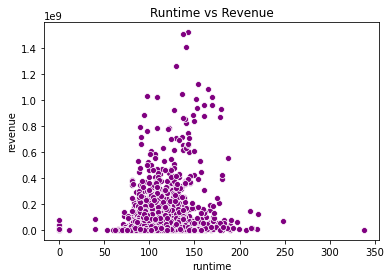

In [ ]:
plt.title('Runtime vs Revenue')
sns.scatterplot(data = AllData, x = "runtime", y = "revenue", color='purple')

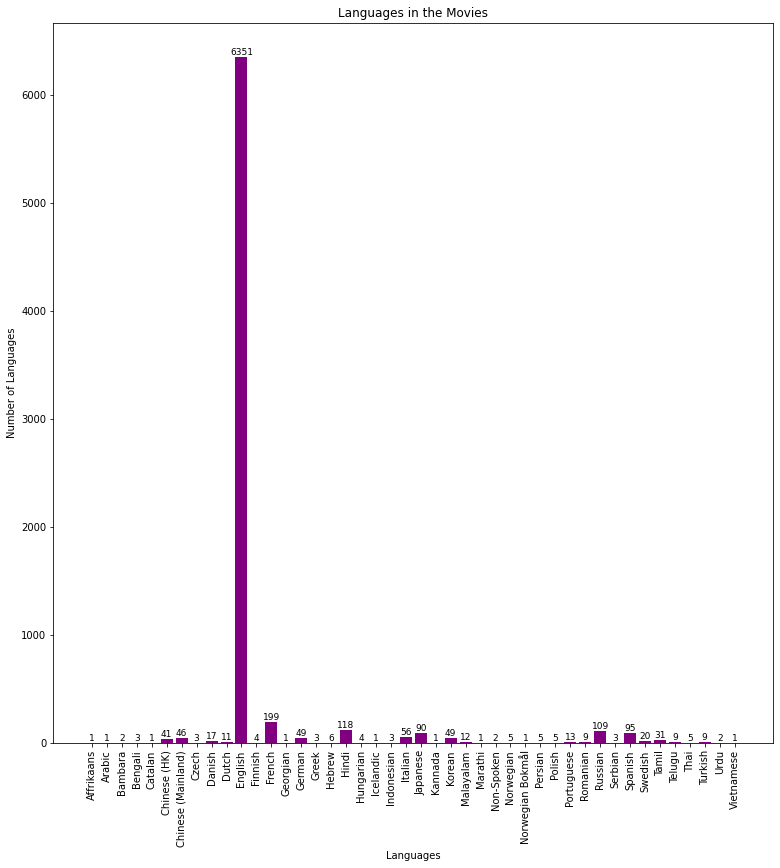

In [ ]:
#This Figure is to show how many movies were realeased by language
d1 = AllData['original_language'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xticks(rotation=90)
plt.title('Languages in the Movies')
plt.xlabel('Languages')
plt.ylabel('Number of Languages')

label = d1.values

for i in range(44):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')
plt.show()

Text(0.5, 1.0, 'Movies in Franchises and Revenue')

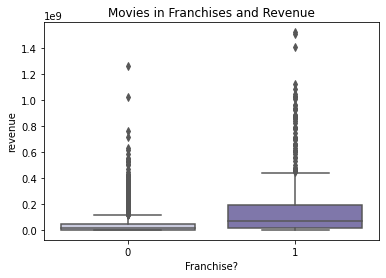

In [ ]:
#TA Boxplot was use to visualize the revenue of movies that were part of a franchise or not and see which one had more
sns.boxplot(x='Franchise?', y='revenue', data=AllData,palette="Purples").set_title('Movies in Franchises and Revenue')

Text(0.5, 1.0, 'Revenue vs Gender of Director')

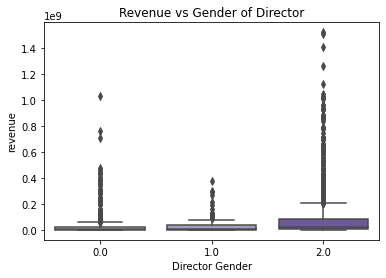

In [ ]:
#Comparing revenue vs gender of director
#1=Female, 2=Male, 0=Unknown 
sns.boxplot(x='Director Gender', y='revenue', data=AllData,palette="Purples").set_title('Revenue vs Gender of Director')

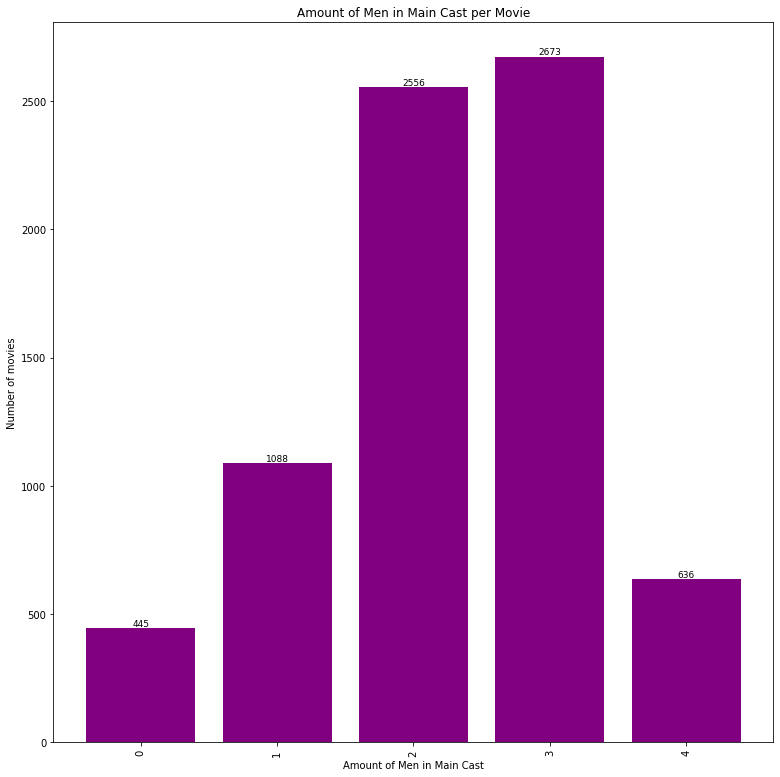

In [ ]:
#This Figure shows how many movies had a cast of mostly men to no men 
d1 = AllData['Amount of Men'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xticks(rotation=90)
plt.title('Amount of Men in Main Cast per Movie')
plt.xlabel('Amount of Men in Main Cast')
plt.ylabel('Number of movies')

label = d1.values

for i in range(5):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')
plt.show()

Text(0.5, 1.0, 'Revenue by the Amount of Men in Main Cast')

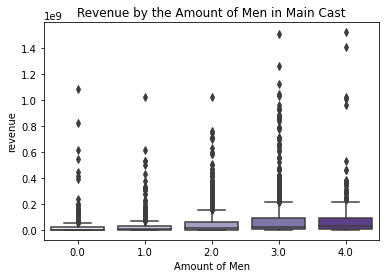

In [ ]:
#This figure shows the revenue vs the amount of men in the main cast
sns.boxplot(x='Amount of Men', y='revenue', data=AllData,palette="Purples").set_title('Revenue by the Amount of Men in Main Cast')

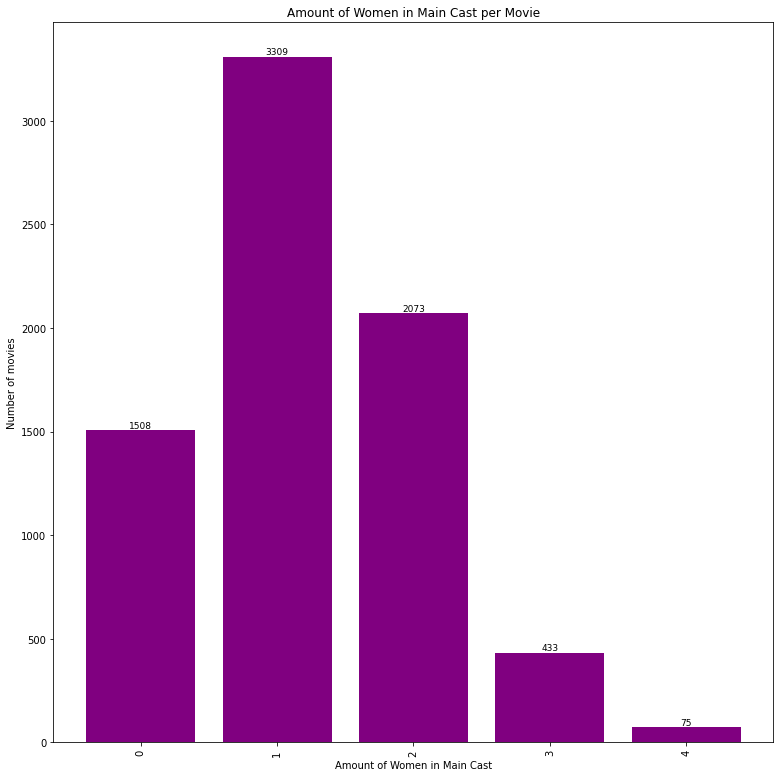

In [ ]:
#This Figure shows how many movies had a cast of mostly Women to no Women 
d1 = AllData['Amount of Women'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xticks(rotation=90)
plt.title('Amount of Women in Main Cast per Movie')
plt.xlabel('Amount of Women in Main Cast')
plt.ylabel('Number of movies')

label = d1.values

for i in range(5):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')
plt.show()

Text(0.5, 1.0, 'Revenue by the Amount of Women in Main Cast')

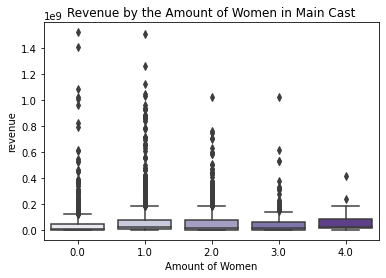

In [ ]:
#This figure shows the revenue vs the amount of women in the main cast

sns.boxplot(x='Amount of Women', y='revenue', data=AllData,palette="Purples").set_title('Revenue by the Amount of Women in Main Cast')

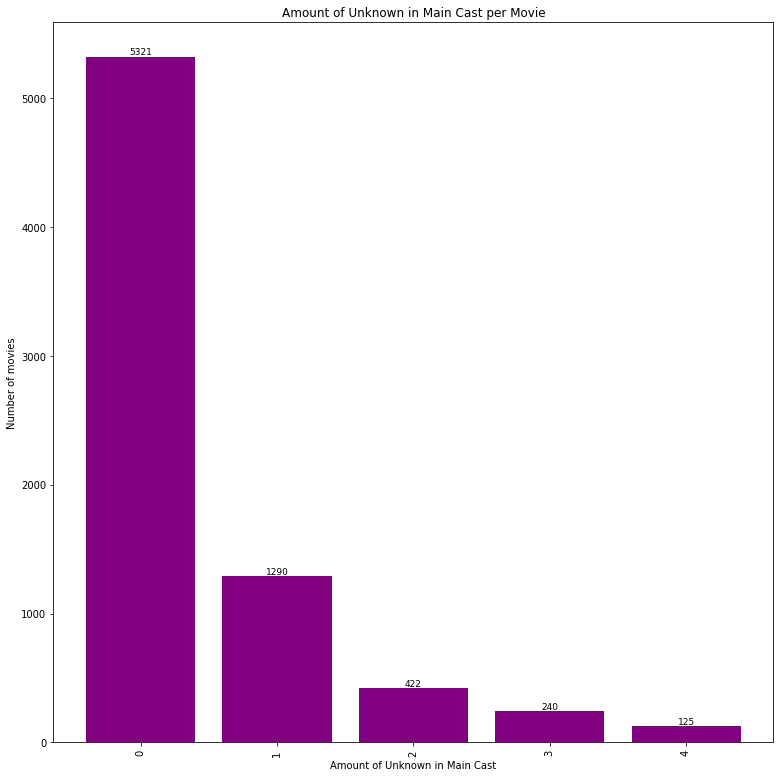

In [ ]:
#This Figure shows how many movies had a cast of mostly Unknown to no Unknown  
d1 = AllData['Amount of Unknown'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xticks(rotation=90)
plt.title('Amount of Unknown in Main Cast per Movie')
plt.xlabel('Amount of Unknown in Main Cast')
plt.ylabel('Number of movies')

label = d1.values

for i in range(5):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')
plt.show()

Text(0.5, 1.0, 'Revenue by the Amount of Unknown in Main Cast')

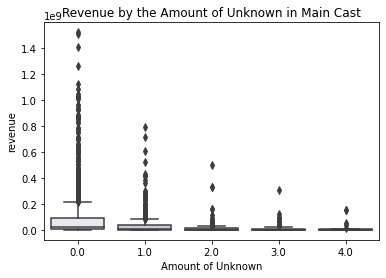

In [ ]:
#This figure shows the revenue vs the amount of unknown in the main cast
sns.boxplot(x='Amount of Unknown', y='revenue', data=AllData,palette="Purples").set_title('Revenue by the Amount of Unknown in Main Cast')

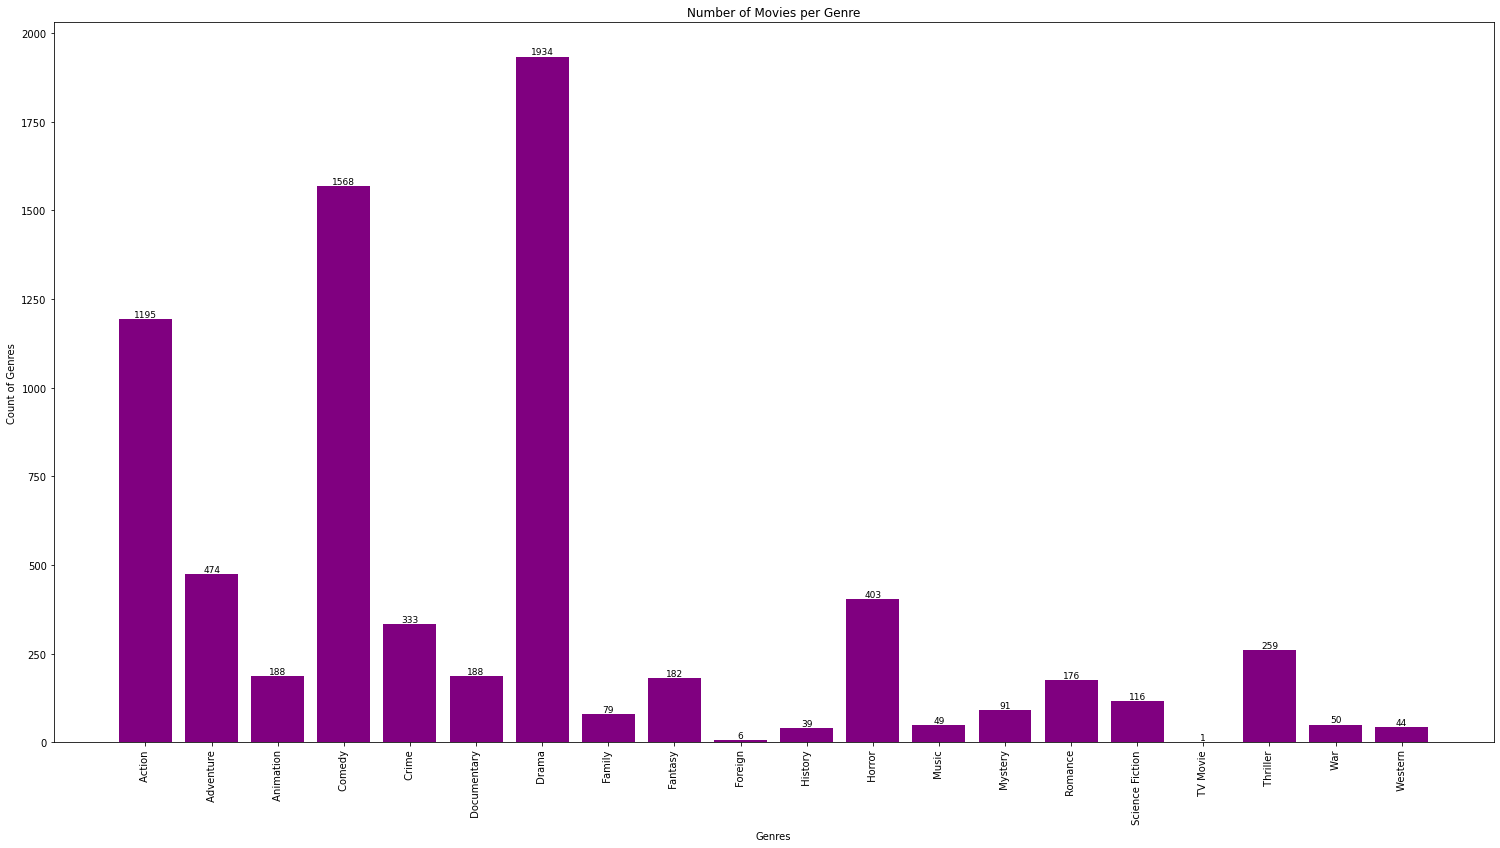

In [ ]:
#This Figure is to show how many movies are per genre 
d1 = AllData['Genre'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xlabel('Genres')
plt.ylabel('Count of Genres')
label = d1.values

plt.xticks(rotation=90)
plt.title('Number of Movies per Genre')

label = d1.values

for i in range(20):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')

plt.show()

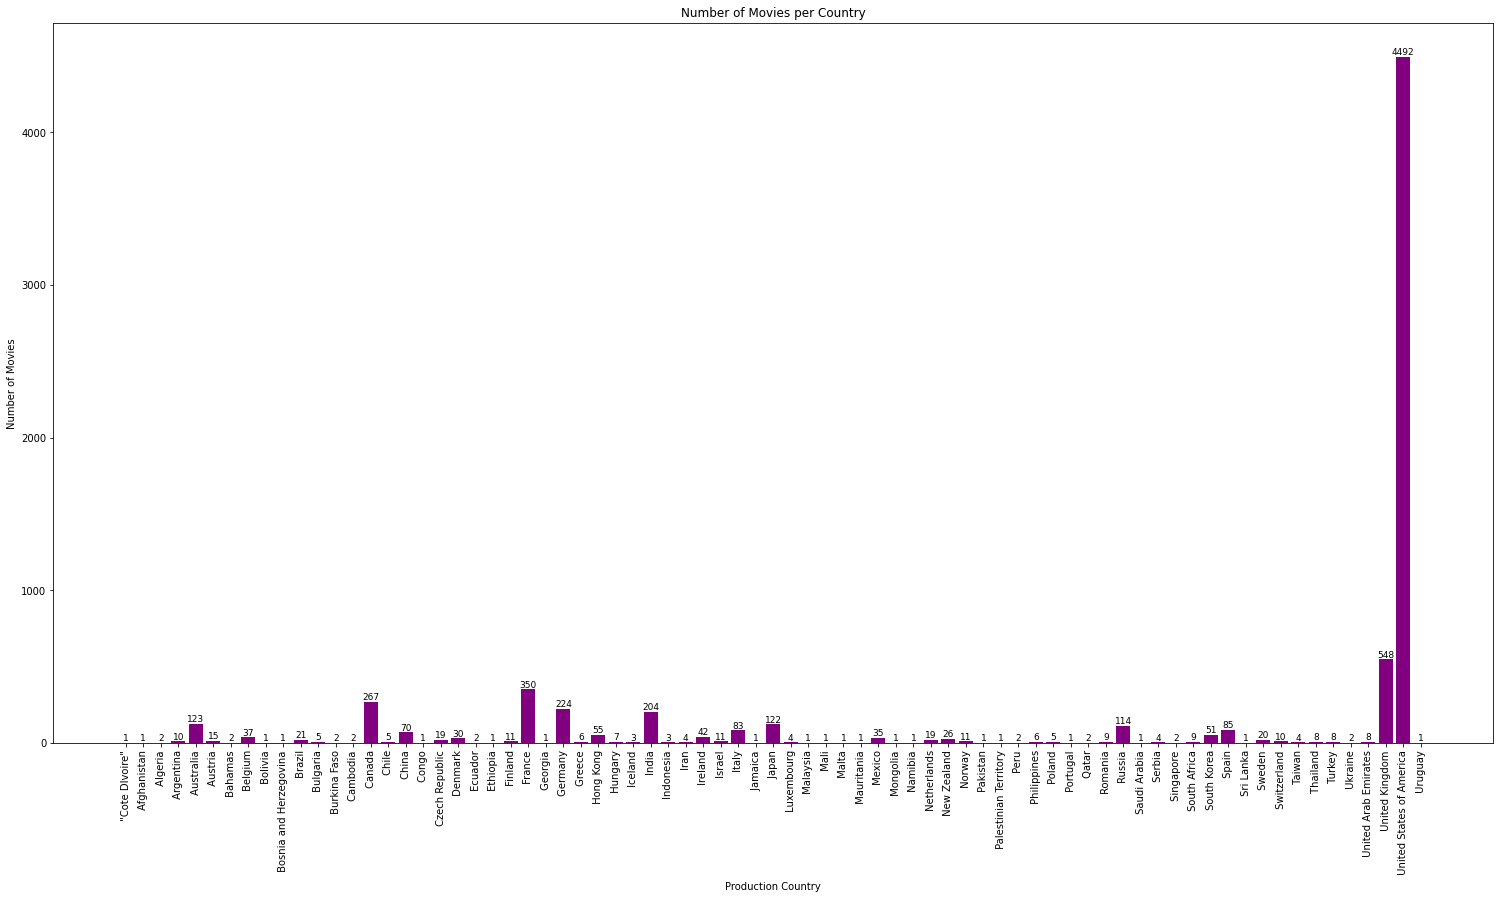

In [ ]:
#Bar chart to show how many movies were produced per country


d1 = AllData['Production Country'].value_counts().sort_index()
X=d1.index
Y=d1.values

fig=plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y,color="purple" )
plt.xlabel('Production Country')
plt.ylabel('Number of Movies')
label = d1.values

plt.xticks(rotation=90)
plt.title('Number of Movies per Country')

label = d1.values

for i in range(75):
  plt.text(x = i, y = label[i], s = label[i],
       size = 9,horizontalalignment='center', verticalalignment='bottom')

plt.show()


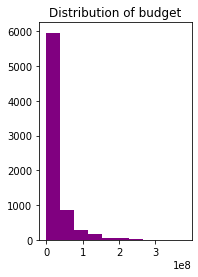

In [ ]:
#Here we see the distribution of the budget for the movies  
plt.subplot(1, 2, 1)
plt.hist(AllData['budget'],color="purple");
plt.title('Distribution of budget');


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <a list of 75 Text major ticklabel objects>)

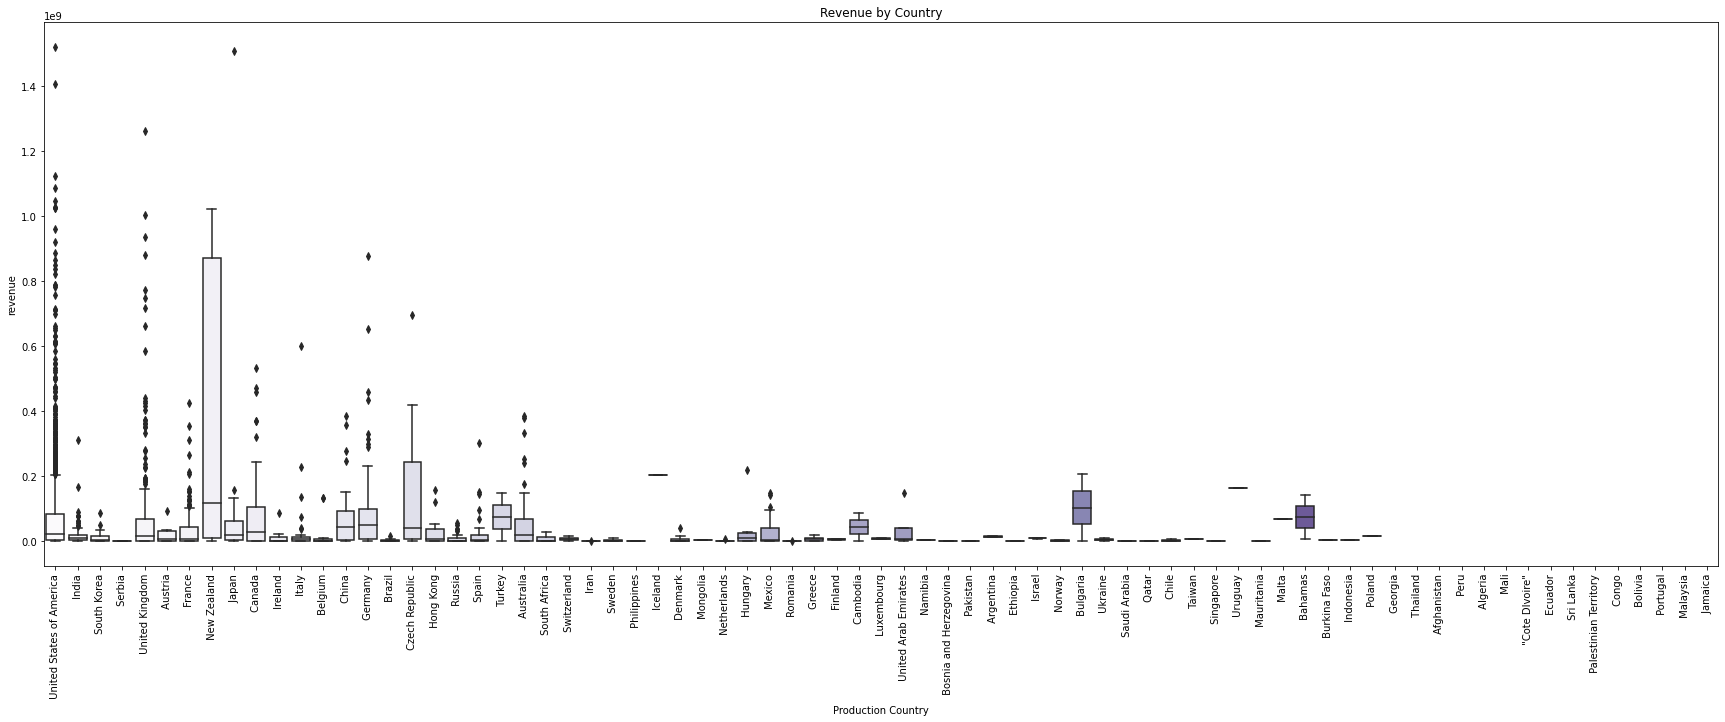

In [ ]:
#This figure shows the distribution of revenues by countries
plt.figure(figsize=(30, 10))
sns.boxplot(x='Production Country', y='revenue', data=AllData,palette="Purples").set_title('Revenue by Country')
plt.xticks(rotation=90 )




# **Missing Values**

In [ ]:
#Here I printed out the amount of missing values in each category for both Train and Test datasets
print("Train Missing Values")
print(dfTrainFIXED.isna().sum())
print("")
print("Test Missing Values")
print(dfTestFIXED.isna().sum())

Train Missing Values
id                           0
Franchise?                   0
budget                       0
Genre                        7
original_language            0
Length of Overview           8
popularity                   0
Main Production Company    156
Production Country          55
release_year                 0
release_month                0
release_day                  0
runtime                      2
status                       0
Length of Tagline          597
title                        0
Actor 1                      0
Actor 1 Gender              26
Actor 2                      0
Actor 2 Gender              42
Actor 3                      0
Actor 3 Gender              50
Actor 4                      0
Actor 4 Gender              73
Amount of Men                0
Amount of Women              0
Amount of Unknown            0
Director                     0
Director Gender             16
revenue                      0
dtype: int64

Test Missing Values
id             

In [ ]:
#Printed out the Train and Test Datasets to see how the Nan Values looked and it there was anything strange
pd.set_option('display.max_rows', None)
dfTrainFIXED



In [ ]:
dfTestFIXED

In [ ]:
#Here the missing values of each column were filled in either with averages, 0 or turning None into pandas Nan
#Training Dataset
dfTrainFIXED['Length of Overview'] = dfTrainFIXED['Length of Overview'].fillna(0)

runMean=dfTrainFIXED['runtime'].mean()
runMean=round(runMean)
dfTrainFIXED['runtime'] = dfTrainFIXED['runtime'].fillna(runMean)

dfTrainFIXED['Length of Tagline'] = dfTrainFIXED['Length of Tagline'].fillna(0)

dfTrainFIXED['release_year'].replace('None', np.nan, inplace=True)
dfTrainFIXED['release_month'].replace('None', np.nan, inplace=True)
dfTrainFIXED['release_day'].replace('None', np.nan, inplace=True)

dfTrainFIXED['Actor 1'].replace('None', np.nan, inplace=True)
dfTrainFIXED['Actor 2'].replace('None', np.nan, inplace=True)
dfTrainFIXED['Actor 3'].replace('None', np.nan, inplace=True)
dfTrainFIXED['Actor 4'].replace('None', np.nan, inplace=True)

dfTrainFIXED['Director'].replace('None', np.nan, inplace=True)


dfTrainFIXED['Genre'] = dfTrainFIXED['Genre'].fillna(0)
dfTrainFIXED['Main Production Company'] = dfTrainFIXED['Main Production Company'].fillna(0)
dfTrainFIXED['Production Country'] = dfTrainFIXED['Production Country'].fillna(0)
dfTrainFIXED['Actor 1'] = dfTrainFIXED['Actor 1'].fillna(0)
dfTrainFIXED['Actor 2'] = dfTrainFIXED['Actor 2'].fillna(0)
dfTrainFIXED['Actor 3'] = dfTrainFIXED['Actor 3'].fillna(0)
dfTrainFIXED['Actor 4'] = dfTrainFIXED['Actor 4'].fillna(0)
dfTrainFIXED['Director'] = dfTrainFIXED['Director'].fillna(0)

dfTrainFIXED['Actor 1 Gender'] = dfTrainFIXED['Actor 1 Gender'].fillna(0)
dfTrainFIXED['Actor 2 Gender'] = dfTrainFIXED['Actor 2 Gender'].fillna(0)
dfTrainFIXED['Actor 3 Gender'] = dfTrainFIXED['Actor 3 Gender'].fillna(0)
dfTrainFIXED['Actor 4 Gender'] = dfTrainFIXED['Actor 4 Gender'].fillna(0)
dfTrainFIXED['Director Gender'] = dfTrainFIXED['Director Gender'].fillna(0)

dfTrainFIXED['release_year'] = dfTrainFIXED['release_year'].fillna(0).astype(float)
dfTrainFIXED['release_month'] = dfTrainFIXED['release_month'].fillna(0).astype(float)
dfTrainFIXED['release_day'] = dfTrainFIXED['release_day'].fillna(0).astype(float)
dfTrainFIXED['status'] = dfTrainFIXED['status'].fillna(0)
dfTrainFIXED['title'] = dfTrainFIXED['title'].fillna(0)

In [ ]:
#Here the missing values of each column were filled in either with averages, 0 or turning None into pandas Nan or random string cells into Nan
#Test Dataset
dfTestFIXED['Length of Overview'] = dfTestFIXED['Length of Overview'].fillna(0)

runMean=dfTestFIXED['runtime'].mean()
runMean=round(runMean)
dfTestFIXED['runtime'] = dfTestFIXED['runtime'].fillna(runMean)

dfTestFIXED['Length of Tagline'] = dfTestFIXED['Length of Tagline'].fillna(0)

dfTestFIXED['release_year'].replace([None], np.nan, inplace=True)
dfTestFIXED['release_year'].replace("NaT", np.nan, inplace=True)
dfTestFIXED['release_month'].replace([None], np.nan, inplace=True)
dfTestFIXED['release_day'].replace([None], np.nan, inplace=True)

dfTestFIXED['Actor 1'].replace('None', np.nan, inplace=True)
dfTestFIXED['Actor 2'].replace('None', np.nan, inplace=True)
dfTestFIXED['Actor 3'].replace('None', np.nan, inplace=True)
dfTestFIXED['Actor 4'].replace('None', np.nan, inplace=True)

dfTestFIXED['Director'].replace('None', np.nan, inplace=True)

dfTestFIXED['Genre'] = dfTestFIXED['Genre'].fillna(0)
dfTestFIXED['Main Production Company'] = dfTestFIXED['Main Production Company'].fillna(0)
dfTestFIXED['Production Country'] = dfTestFIXED['Production Country'].fillna(0)
dfTestFIXED['Actor 1'] = dfTestFIXED['Actor 1'].fillna(0)
dfTestFIXED['Actor 2'] = dfTestFIXED['Actor 2'].fillna(0)
dfTestFIXED['Actor 3'] = dfTestFIXED['Actor 3'].fillna(0)
dfTestFIXED['Actor 4'] = dfTestFIXED['Actor 4'].fillna(0)
dfTestFIXED['Director'] = dfTestFIXED['Director'].fillna(0)

dfTestFIXED['Actor 1 Gender'] = dfTestFIXED['Actor 1 Gender'].fillna(0)
dfTestFIXED['Actor 2 Gender'] = dfTestFIXED['Actor 2 Gender'].fillna(0)
dfTestFIXED['Actor 3 Gender'] = dfTestFIXED['Actor 3 Gender'].fillna(0)
dfTestFIXED['Actor 4 Gender'] = dfTestFIXED['Actor 4 Gender'].fillna(0)
dfTestFIXED['Director Gender'] = dfTestFIXED['Director Gender'].fillna(0)

dfTestFIXED['release_year'] = dfTestFIXED['release_year'].fillna(0).astype(float)
dfTestFIXED['release_month'] = dfTestFIXED['release_month'].fillna(0).astype(float)
dfTestFIXED['release_day'] = dfTestFIXED['release_day'].fillna(0).astype(float)
dfTestFIXED['status'] = dfTestFIXED['status'].fillna(0)
dfTestFIXED['title'] = dfTestFIXED['title'].fillna(0)

In [ ]:
#Here I printed out the amount of missing values in each category for both Train and Test datasets after many had been fixed
print("Train Missing Values")
print(dfTrainFIXED.isna().sum())
print("")
print("Test Missing Values")
print(dfTestFIXED.isna().sum())

Train Missing Values
id                         0
Franchise?                 0
budget                     0
Genre                      0
original_language          0
Length of Overview         0
popularity                 0
Main Production Company    0
Production Country         0
release_year               0
release_month              0
release_day                0
runtime                    0
status                     0
Length of Tagline          0
title                      0
Actor 1                    0
Actor 1 Gender             0
Actor 2                    0
Actor 2 Gender             0
Actor 3                    0
Actor 3 Gender             0
Actor 4                    0
Actor 4 Gender             0
Amount of Men              0
Amount of Women            0
Amount of Unknown          0
Director                   0
Director Gender            0
revenue                    0
dtype: int64

Test Missing Values
id                         0
Franchise?                 0
budget           

# **Modeling with Local Data**

In [ ]:
#One fo the first things that need to be done is for the dataframes to get their dummy variables together so we dont get extra columns
#I decided to join both dataframes to be able to create the graphs later on using all of our data
#First though I made a copy of the dataframes as to not change them
dfTrainModel=dfTrainFIXED.copy()
dfTestModel=dfTestFIXED.copy()

#I then added a new column to each of the dataframes just to tell which one's are from the train and test data sets
dfTrainModel["dataset"]="Train"
dfTestModel["dataset"]="Test"
frames= [dfTrainModel, dfTestModel]
ModelData = pd.concat(frames)
ModelData

In [ ]:
#Here the dummy variables for this huge table were created using pd.get_dummies
ModelX=ModelData[["Franchise?","budget","Genre","original_language","Length of Overview","popularity","Main Production Company","Production Country","release_year","release_month","release_day","runtime","status","Length of Tagline","title","Actor 1",
                           "Actor 1 Gender","Actor 2","Actor 2 Gender", "Actor 3","Actor 3 Gender","Actor 4","Actor 4 Gender", "Amount of Men","Amount of Women","Amount of Unknown","Director", "Director Gender","dataset", "revenue"]]

ModelX=pd.get_dummies(ModelX, columns=["Genre","original_language","Main Production Company","Production Country","status","title","Actor 1",'Actor 1 Gender',"Actor 2",'Actor 2 Gender', "Actor 3",'Actor 3 Gender',"Actor 4",'Actor 4 Gender',"Director",'Director Gender',], drop_first=True)
ModelX

In [ ]:
#Here the Huge table with the dummy variables is split up based on it being Train or Test data into two new tables ready to be put into the model
ModelTrain=ModelX[ModelX['dataset'] == "Train"]

ModelTest=ModelX[ModelX['dataset'] == "Test"]

#I then droppped the revenue and dataset column from the Test data set and just the dataset column from Train
ModelTest = ModelTest.drop(['revenue'], axis=1)
ModelTest = ModelTest.drop(['dataset'], axis=1)
ModelTrain = ModelTrain.drop(['dataset'], axis=1)

In [ ]:
#Now we divide the train dataset into independent and dependednt variables
#As well as have the right Test dataset with the right variable 

df1_X_train=ModelTrain.drop(["revenue"], axis=1)
df1_y_train= ModelTrain[["revenue"]]

df1_X_test= ModelTest


In [ ]:
#I realized that without a Test Revenue Column to compare it with it was probably best to split the train data to check local scores and Tweeks without having to go to KAggle everytime
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(df1_X_train, df1_y_train, train_size=0.8, test_size=0.2, random_state=100)

## **First Model**

In [ ]:
#The first model to try for this project will be the Linear Regression Model 
#Normal Parameters gave the best results
#First the Accuracy of the Train Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None) 
lin_reg.fit(train_X,train_y)

LinTrPre=lin_reg.predict(train_X)

model1_train_r2=lin_reg.score(train_X,train_y)
print("Score: ", model1_train_r2)

Score:  0.9999999999999604


In [ ]:
#Test data Score
LinPre=lin_reg.predict(val_X)

model1_test_r2 =lin_reg.score(val_X,val_y)

print(model1_test_r2)


0.5341231917789147


## **Second Model**

In [ ]:
#Second model is the Random Forest Regression Model with original parameters 
from sklearn.ensemble import RandomForestRegressor

RForest=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                              n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
RForest.fit(train_X,train_y)
RPre=RForest.predict(train_X)

model2_train_r2=RForest.score(train_X,train_y)
print("Train Score: ",model2_train_r2)

RPre=RForest.predict(val_X)

model2_train_r2=RForest.score(val_X,val_y)
print("Test Score: ",model2_train_r2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train Score:  0.9578062817698926
Test Score:  0.5893831581538973


In [ ]:
#Random Forest Regression Model Though this one is modified for the best resutls with the model
from sklearn.ensemble import RandomForestRegressor

RForest=RandomForestRegressor(n_estimators=400, criterion='mse', max_depth=70, min_samples_split=10, min_samples_leaf=4, min_weight_fraction_leaf=0.0,
                              max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
                              random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
RForest.fit(train_X,train_y)
RPre=RForest.predict(train_X)

model2_train_r2=RForest.score(train_X,train_y)
print("Train Score: ",model2_train_r2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train Score:  0.8691907833581708


In [ ]:
#Test Data/Score
RPre=RForest.predict(val_X)

model2_train_r2=RForest.score(val_X,val_y)
print("Test Score: ",model2_train_r2)

Test Score:  0.5736519658983699


## **Third Model**

In [ ]:
#Third Model is the GaussianNB model, cant really 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf=GaussianNB(priors=None, var_smoothing=1e-09)

clf.fit(train_X,train_y)
TPred=clf.predict(train_X)

model1_train_accuracy=metrics.accuracy_score(train_y,TPred)
print(model1_train_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6783333333333333


In [ ]:
#Test Data/Score

TEPred=clf.predict(val_X)

model1_test_accuracy=metrics.accuracy_score(val_y,TEPred)
print(model1_test_accuracy)


0.0


## **Fourth Model**

In [ ]:
#Fourth Model is the Extra Trees Regressor Model with normal parameters 
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                          max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
                          random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
reg.fit(train_X, train_y)
Tpredict=reg.predict(train_X)
Accuracy=reg.score(train_X,train_y)


TestPredict=reg.predict(val_X)
TrainScore=reg.score(val_X, val_y)
print(TrainScore)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.5993116114936881


In [ ]:
#Extra Trees Regressor Model Though this one is modified for the best resutls with the model
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=20, min_samples_split=2, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                          max_features='auto', max_leaf_nodes=30, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
                          random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
reg.fit(train_X, train_y)
Tpredict=reg.predict(train_X)
Accuracy=reg.score(train_X,train_y)


TestPredict=reg.predict(val_X)
TrainScore=reg.score(val_X, val_y)
print(TrainScore)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.6162734768171786


# **Kaggle Export**

## **Model 1**

In [ ]:
#Here I did the Kaggle predictions to be able to compare with the actual answers on the site
#First Model Training Data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None) 
lin_reg.fit(df1_X_train,df1_y_train)

LinTrPre=lin_reg.predict(df1_X_train)

MODEL1=lin_reg.score(df1_X_train,df1_y_train)
print("Train Score: ", MODEL1)


Train Score:  0.9999999999998911


In [ ]:
#First Model Test Data
LinPre=lin_reg.predict(df1_X_test)

print(LinPre)


[[ 23825997.08146721]
 [-40534323.27115971]
 [ 96688474.5668337 ]
 ...
 [ 25864265.07116669]
 [ 17619471.34090531]
 [ -3225167.94137508]]


In [ ]:
#Here I seperated the list of lists that was the prediction to have all the prediction in a new dataset that will be exported and uploaded
F=[]
for x in LinPre:
  F.append(x[0])

M1=pd.DataFrame()
M1["id"]=ModelData[ModelData['dataset'] == "Test"]["id"]
X=0
X=pd.Series(F)
M1["revenue"]=X


In [ ]:
#Here the dataset was exported as a CSV to upload to Kaggle
from google.colab import files
#X=generate_submission (M1,"revenue","LinearRegression.csv")
M1.to_csv("LinearRegression.csv", index=False)
files.download("LinearRegression.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model 2**

In [ ]:
#Here I did the second Kaggle predictions to be able to compare with the actual answers on the site
#Second Model Training Data
from sklearn.ensemble import RandomForestRegressor

RForest=RandomForestRegressor(n_estimators=400, criterion='mse', max_depth=70, min_samples_split=10, min_samples_leaf=4, min_weight_fraction_leaf=0.0,
                              max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
                              random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
RForest.fit(df1_X_train,df1_y_train)
RPre=RForest.predict(df1_X_train)

model2_train_r2=RForest.score(df1_X_train,df1_y_train)
print("Train Score: ",model2_train_r2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train Score:  0.8636749525735062


In [ ]:
#Second Model Test Data
RPre=RForest.predict(df1_X_test)
print(RPre)

[15606921.60334382  9169525.16417175 10045785.98771454 ...
 76288820.27894168 80842373.27817392 14246016.03771936]


In [ ]:
#Here I seperated the list of lists that was the prediction to have all the prediction in a new dataset that will be exported and uploaded
#U=[]
#for x in RPre:
#  U.append(x[0])

M2=pd.DataFrame()
M2["id"]=ModelData[ModelData['dataset'] == "Test"]["id"]
XX=0
XX=pd.Series(RPre)
M2["revenue"]=XX

In [ ]:
#Here the dataset was exported as a CSV to upload to Kaggle
from google.colab import files
#X=generate_submission (M1,"revenue","LinearRegression.csv")
M2.to_csv("RandomForest.csv", index=False)
files.download("RandomForest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model 3**

In [ ]:
#Here I did the third Kaggle predictions to be able to compare with the actual answers on the site
#Third Model Training Data
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf=GaussianNB(priors=None, var_smoothing=1e-09)

clf.fit(df1_X_train,df1_y_train)
TPred=clf.predict(df1_X_train)

model1_train_accuracy=metrics.accuracy_score(df1_y_train,TPred)
print(model1_train_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6716666666666666


In [ ]:
#Third Model Test Data
TEPred=clf.predict(df1_X_test)

print(TEPred)

[1.0000000e+00 1.6000000e+06 1.0000000e+00 ... 4.4093280e+06 1.3101672e+07
 4.1649800e+05]


In [ ]:
#The prediction information is added to a new dataset that will be exported and uploaded
M3=pd.DataFrame()
M3["id"]=ModelData[ModelData['dataset'] == "Test"]["id"]
XXX=0
XXX=pd.Series(TEPred)
M3["revenue"]=XXX
M3

,id,revenue
0,3001,1.000000e+00
1,3002,1.600000e+06
2,3003,1.000000e+00
3,3004,7.500000e+06
4,3005,1.672730e+06
5,3006,1.000000e+00
6,3007,1.000000e+00
7,3008,5.840531e+07
8,3009,1.362008e+07
9,3010,1.616261e+08


In [ ]:
#Here the dataset was exported as a CSV to upload to Kaggle
from google.colab import files
#X=generate_submission (M1,"revenue","LinearRegression.csv")
M3.to_csv("GaussianNB.csv", index=False)
files.download("GaussianNB.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model 4**

In [ ]:
#Here I did the fourth Kaggle predictions to be able to compare with the actual answers on the site
#Fourth Model Training Data and Test Data
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=20, min_samples_split=2, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                          max_features='auto', max_leaf_nodes=30, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
                          random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
reg.fit(df1_X_train, df1_y_train)
Tpredict=reg.predict(df1_X_train)
Accuracy=reg.score(df1_X_train,df1_y_train)


TestPredict=reg.predict(df1_X_test)
print(TestPredict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[37623939.28029214 12159550.90576037 12457062.30134207 ...
 38973677.55697771 21859786.13935443 13786673.15143121]


In [ ]:
#The prediction information is added to a new dataset that will be exported and uploaded
M4=pd.DataFrame()
M4["id"]=ModelData[ModelData['dataset'] == "Test"]["id"]
XXXX=0
XXXX=pd.Series(TestPredict)
M4["revenue"]=XXXX
M4

,id,revenue
0,3001,3.762394e+07
1,3002,1.215955e+07
2,3003,1.245706e+07
3,3004,2.008171e+07
4,3005,1.311355e+07
5,3006,1.228673e+07
6,3007,1.233015e+07
7,3008,7.964891e+07
8,3009,3.832950e+07
9,3010,4.373788e+08


In [ ]:
#Here the dataset was exported as a CSV to upload to Kaggle
from google.colab import files
#X=generate_submission (M1,"revenue","LinearRegression.csv")
M4.to_csv("ExtraTressRegressor.csv", index=False)
files.download("ExtraTressRegressor.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>